Generated points:
[[ 2.44018705e-01 -6.57376878e-01]
 [-7.71777140e-01  8.71814614e-01]
 [ 9.60943458e-01 -5.51222752e-01]
 [ 8.78916270e-01  9.19434723e-01]
 [-3.38037344e-01 -7.82531987e-01]
 [ 3.45855143e-01  7.20592944e-01]
 [-5.66195438e-01  7.29794709e-01]
 [ 8.55288552e-02 -5.05565508e-01]
 [ 5.37560461e-01  6.46277240e-01]
 [ 2.29998139e-01  4.03865451e-01]
 [ 6.79131921e-01 -7.89800232e-01]
 [ 3.42332524e-01  9.06058017e-01]
 [ 6.94462388e-01  1.27813642e-01]
 [ 2.90499678e-01 -9.52193753e-02]
 [ 3.16728444e-01  3.95430224e-01]
 [-6.82805549e-01 -5.62083539e-01]
 [ 1.88310904e-01  6.19709962e-01]
 [-9.37868239e-01 -7.22488910e-01]
 [-6.67233653e-01 -8.52218954e-01]
 [-6.05793097e-01 -4.37004379e-01]
 [-4.40662373e-01  6.97710237e-01]
 [ 4.07426002e-01 -5.51820547e-02]
 [ 3.97537515e-01  8.95907281e-01]
 [-1.43510014e-01  4.36850934e-04]
 [-1.79592651e-01  9.29637032e-01]
 [-4.13627878e-01 -6.32553187e-01]
 [-4.94543700e-01 -7.81236331e-01]
 [-1.03091588e-01 -5.12423925e-01]
 [

C:\Users\Milan\AppData\Local\Temp\ipykernel_756\528260317.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:, 0], points[:, 1],
C:\Users\Milan\AppData\Local\Temp\ipykernel_756\528260317.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


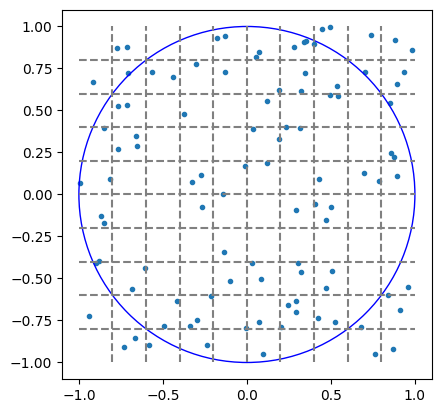

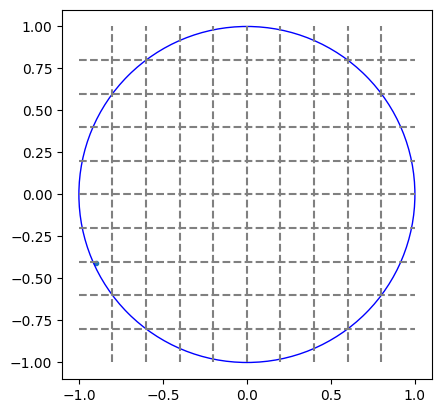

In [3]:
import hyperbolicTSNE.uniform_grid as grid
import numpy as np
from matplotlib import pyplot as plt

def generate_points(n):
    # Generate random x and y coordinates in the range (-1, 1)
    x_coordinates = np.random.uniform(-1, 1, n)
    y_coordinates = np.random.uniform(-1, 1, n)
    
    # Combine x and y coordinates into a single array of points
    points = np.column_stack((x_coordinates, y_coordinates))
    
    return points

def plot_poincare(points, grid_size, labels=None):
    fig, ax = plt.subplots()
    

    ax.scatter(points[:, 0], points[:, 1],
               c=labels,
               marker=".",
               cmap="tab10")
    
    # Draw grid lines
    for i in range(1, grid_size):
        x = np.linspace(-1, 1, 100)
        y = np.ones_like(x) * (-1 + 2 * i / grid_size)
        ax.plot(x, y, color='gray', linestyle='--')
        ax.plot(y, x, color='gray', linestyle='--')

    ax.add_patch(plt.Circle((0, 0), radius=1, edgecolor="b", facecolor="None"))
    ax.axis("square")
    fig.show()
    #fig.savefig(f"results/{dataset.name}.png")

def get_points_in_grid(points, indices, starts_counts, grid_index):
    start = starts_counts[grid_index*2]
    stride = starts_counts[grid_index*2+1]
    return points[indices[start : start+stride]]

# Example usage:
n = 100
points = generate_points(n)
print("Generated points:")
print(points)

grid_size = 10

result_indices, result_starts_counts = grid.divide_points_over_grid(points, grid_size)
#grid.divide_points_over_grid(points, grid_size)
print("indices:")
print(result_indices)
print("starts, counts:")
print(result_starts_counts)

plot_poincare(points, grid_size)
plot_poincare(get_points_in_grid(points, result_indices, result_starts_counts, 2), grid_size)
